#Data exploration

Descripción:
- This notebook focus on explorate data that will be  use for test and training.
---
David Andrés Torres Betancour \\
System Engineering Student \\
Departamento de Ingeniería de Sistemas \\
Universidad de Antioquia \\
davida.torres@udea.edu.co

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files
import h5py
import random
%matplotlib inline

##Tools

In [35]:
def fetchDataFromKaggle():
  print("Upload kaggle.json file with credentials | IMPORTANT: Filename must be:kaggle.json\n")
  files.upload() #Upload file
  os.environ['KAGGLE_CONFIG_DIR'] = '/content' #Setup folder
  ! chmod 600 /content/kaggle.json  #Hide kaggle.json
  ! kaggle datasets download -d deividt/snake-breeds #Download dataset
  ! unzip \*.zip && rm *.zip #Unzip downloaded file and delete zip
  print("Loaded completed")

def missingValues():
  k = df.isna().sum()
  miss_values = k[k!=0]
  if miss_values.size>0:
    return (miss_values)
  return ("No missing values")



def decode_breedID(idx):
  df_decode = pd.read_csv('decode_breed.csv')
  breed_encode = df_decode['breed_encode']
  return df_decode.loc[breed_encode == idx]['breed'].tolist()[0]

def getRandomGroup(max_groups=1):

  group_num =str(random.randint(1,max_groups))
  destination_filepath ='group_'+group_num+'.h5'
  with h5py.File(destination_filepath, "r") as f:
      
      print("Reading data...")

      x = f["input_data"][:]
      x = x.reshape(x.shape[0],224,224,3)

      y = f["input_labels"][:]

      print("Keys: ",list(f.keys()))
      print('x shape =', x.shape, '| y shape =', y.shape)
      
      
      
      return x,y,group_num
#Printing ------------------------------------------------------------------------
def showGroupDetailedInfo(group_num,y):
 

  unique_values = np.unique(y)

  snake_names=[]
  snake_count=[]
  for value in unique_values:
    snake_name=decode_breedID(value)
    snake_names.append( value )
    snake_count.append(len(y[y==value]))
   
   #Plotting bar chart
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.bar(snake_names,snake_count)
  ax.set_ylabel('Count')
  ax.set_xlabel('Breed code')
  ax.set_title('Group '+group_num+' Breeds count')
  plt.show()


def showRandomImage(x,y): 
  index = random.randint(0,x.shape[0])
  image = x[index]
  plt.imshow(image)
  print("Img shape:",image.shape)
  print('breed:', decode_breedID(y[index]))


def show_labeled_image_mosaic(imgs, labels, figsize=(20, 20), idxs=None):
    """
    Author: Raul Ramos Pollan
    """
    plt.figure(figsize=figsize)
    for labi,lab in [i for i in enumerate(np.unique(labels))]:
        k = imgs[labels == lab]
        _idxs = idxs[:5] if idxs is not None else np.random.permutation(len(k))[:5]
        for i, idx in enumerate(_idxs):
            if i == 0:
                plt.subplot(10, 11, labi*11+1)
                plt.title("LABEL %d" % lab)
                plt.plot(0, 0)
                plt.axis("off")

            img = k[idx]
            plt.subplot(10, 11, labi*11+i+2)
            plt.imshow(img, cmap=plt.cm.Greys_r)
            plt.axis("off")

## Loading data

- Download data from Kaggle | Important this cell can take several minutes

In [29]:
fetchDataFromKaggle()

Upload kaggle.json file with credentials | IMPORTANT: Filename must be:kaggle.json



KeyboardInterrupt: ignored

- Reading data

In [4]:
df = pd.read_csv('data.csv')

- El realizarse una analisis general de los datos se cargará el archivo .csv el cual contiene los nombres y las etiquetas correspondiente de las muestras


##Data exploration

- First  samples

In [5]:
df.head(5)

,id,image_id,breed,breed_encode
0,0,3f8b32599b6c439c928b8ece2b89aa93,thamnophis-sirtalis,9.0
1,1,ae317697c17a4f169201e6d7d268b497,thamnophis-sirtalis,9.0
2,2,6630beeadea5494887b6d324fdb452a9,thamnophis-sirtalis,9.0
3,3,4a53a37f861945bd8a1bcc194825c456,thamnophis-sirtalis,9.0
4,4,7552916f07e94c358458bbedefe9143b,thamnophis-sirtalis,9.0


- Last samples

In [6]:
df.tail(5)

,id,image_id,breed,breed_encode
79995,73995,cb7977ade7734668a2a17d4a35fcda58,nerodia-erythrogaster,3.0
79996,73996,75e429bec05a413984fd6aa0eff6980e,nerodia-erythrogaster,3.0
79997,73997,095873af5c5047449a6e939d42a2a496,nerodia-erythrogaster,3.0
79998,73998,97db701611,nerodia-erythrogaster,3.0
79999,73999,bf28c8247b8f420ba24ceaa9fed44701,nerodia-erythrogaster,3.0


- Missing values in columns

In [7]:
missingValues()

'No missing values'

- Data types

In [8]:
for c in df.columns:
    print ("%20s"%c, df[c].dtype)

                  id int64
            image_id object
               breed object
        breed_encode float64


- Data Size

In [9]:
df.shape

(80000, 4)

- Breeds:

In [10]:
print(pd.unique(df['breed']));

['thamnophis-sirtalis' 'storeria-dekayi' 'pantherophis-obsoletus'
 'crotalus-atrox' 'nerodia-sipedon' 'pituophis-catenifer'
 'pantherophis-alleghaniensis' 'agkistrodon-contortrix'
 'diadophis-punctatus' 'nerodia-erythrogaster']


- Total breeds:

In [11]:
len ( pd.unique(df['breed']))

10

- Total images for each breed : 

In [12]:
df['breed'].value_counts()

pantherophis-obsoletus         8000
nerodia-sipedon                8000
pituophis-catenifer            8000
storeria-dekayi                8000
diadophis-punctatus            8000
agkistrodon-contortrix         8000
thamnophis-sirtalis            8000
pantherophis-alleghaniensis    8000
crotalus-atrox                 8000
nerodia-erythrogaster          8000
Name: breed, dtype: int64

- Data density:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


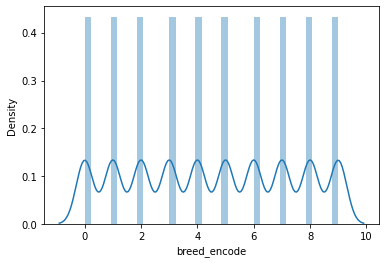

In [13]:
sns.distplot(df['breed_encode']);

###Visualizating Images

- Reading random group (.h5 file):

In [36]:
x,y,groupNum =getRandomGroup( max_groups=10 )

Reading data...
Keys:  ['input_data', 'input_labels']
x shape = (2000, 224, 224, 3) | y shape = (2000,)


- Breeds count

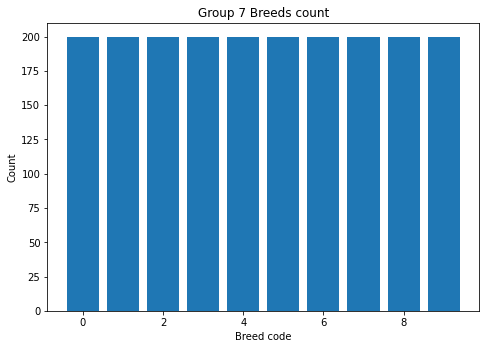

In [37]:
showGroupDetailedInfo(groupNum,y)

- Random images from each breed:

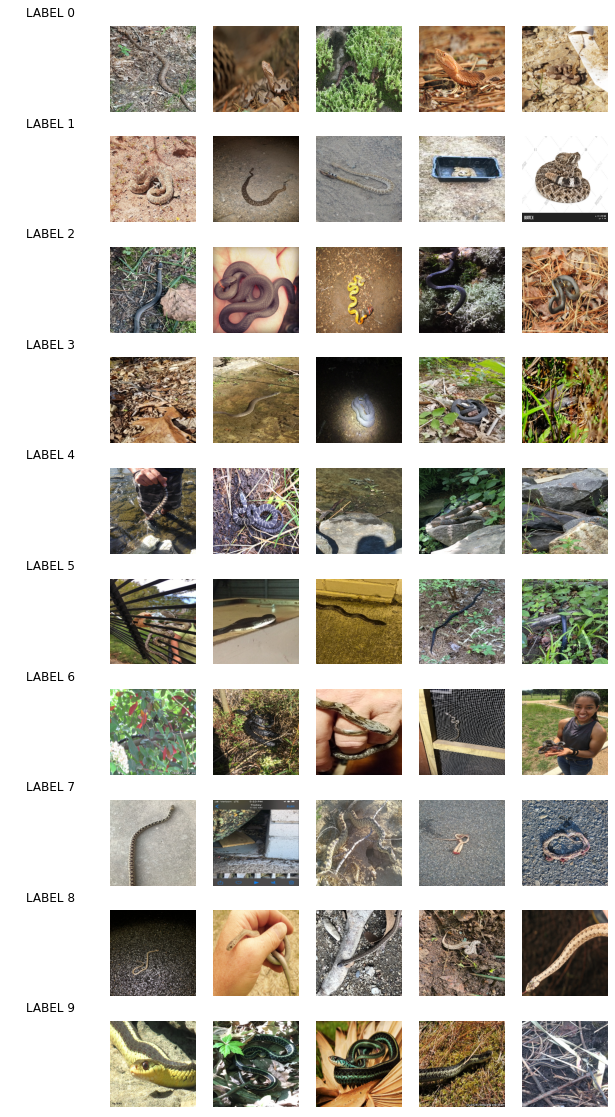

In [39]:
 show_labeled_image_mosaic(x,y)